# linear regression with show models of tensorbord

In [1]:
import pylab
import numpy as np
import seaborn as sns
import tensorflow as tf

In [2]:
#test data
X = np.linspace(0,1,100)
noise = np.random.random(100)*0.5
y = 0.8*X + 0.5 + noise 
n = X.shape[0]

In [3]:
#parameters
learning_rate = 0.1
epochs = 500 
step = 100
log_path = "./logs/"

In [4]:
#tf required setting 
tf_X = tf.placeholder("float",name="X")
tf_y = tf.placeholder("float",name="y")
#tf learning parameters
w = tf.Variable(np.random.random(),name="weight")
b = tf.Variable(np.random.random(),name="bias")

In [5]:
#a linear model name filed definitation 
with tf.name_scope("model"):
    pred = tf.add(tf.multiply(tf_X,w),b)
with tf.name_scope("loss"):
    cost = tf.reduce_sum(tf.pow(pred-tf_y,2)) / (2*n)
with tf.name_scope("SGD"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [6]:
#tf graph for running
init = tf.global_variables_initializer()
tf.summary.scalar("loss",cost)
merged_summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(log_path,graph=tf.get_default_graph())
    
    for epoch in xrange(epochs):
        for (nx,ny) in zip (X,y):
            sess.run(optimizer,feed_dict={tf_X:nx,tf_y:ny})
        if epoch % step == 0:
            c,summary = sess.run([cost,merged_summary_op],feed_dict={tf_X:X,tf_y:y})
            s = "Epoch:%s,cost:%s,w:%s,b:%s"%(epoch,c,sess.run(w),sess.run(b))
            print s
        summary_writer.add_summary(summary,epoch)
        

Epoch:0,cost:0.0152993,w:0.643302,b:0.885581
Epoch:100,cost:0.00921455,w:0.706479,b:0.755531
Epoch:200,cost:0.00884795,w:0.758705,b:0.726973
Epoch:300,cost:0.00875241,w:0.785408,b:0.712372
Epoch:400,cost:0.00872759,w:0.79906,b:0.704907


## 模型图
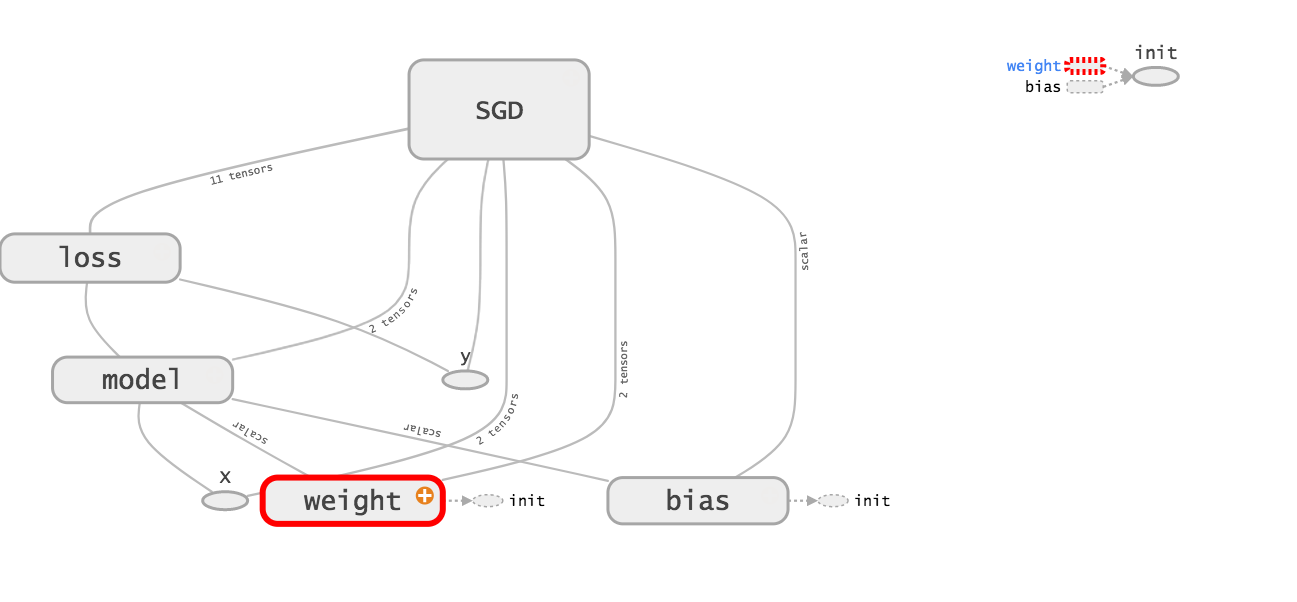

## 训练图
